In [56]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [66]:
crime  = pd.read_csv('Crime_Data.csv')

In [67]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [68]:
crime.shape

(1004847, 28)

In [72]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

In [12]:
crime.isnull().any()

DR_NO             False
Date Rptd         False
DATE OCC          False
TIME OCC          False
AREA              False
AREA NAME         False
Rpt Dist No       False
Part 1-2          False
Crm Cd            False
Crm Cd Desc       False
Mocodes            True
Vict Age          False
Vict Sex           True
Vict Descent       True
Premis Cd          True
Premis Desc        True
Weapon Used Cd     True
Weapon Desc        True
Status             True
Status Desc       False
Crm Cd 1           True
Crm Cd 2           True
Crm Cd 3           True
Crm Cd 4           True
LOCATION          False
Cross Street       True
LAT               False
LON               False
dtype: bool

In [74]:
crime.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151591
Vict Age                0
Vict Sex           144604
Vict Descent       144616
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677654
Weapon Desc        677654
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935717
Crm Cd 3          1002532
Crm Cd 4          1004783
LOCATION                0
Cross Street       850626
LAT                     0
LON                     0
dtype: int64

In [99]:
drop_cols = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Mocodes' , 'TIME OCC']
crime.drop(columns=drop_cols, inplace=True, errors='ignore')

In [103]:
crime[['Vict Sex', 'Vict Descent']] = crime[['Vict Sex', 'Vict Descent']].fillna('Unknown')
crime[['Premis Cd', 'Premis Desc']] = crime[['Premis Cd', 'Premis Desc']].fillna('Unknown')
crime['Crm Cd 1'] = crime['Crm Cd 1'].fillna(crime['Crm Cd 1'].mode()[0])
crime['Status'] = crime['Status'].fillna(crime['Status'].mode()[0])

In [105]:
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])

In [107]:
crime.isnull().any()

DR_NO           False
Date Rptd       False
DATE OCC        False
AREA            False
AREA NAME       False
Rpt Dist No     False
Part 1-2        False
Crm Cd          False
Crm Cd Desc     False
Vict Age        False
Vict Sex        False
Vict Descent    False
Premis Cd       False
Premis Desc     False
Status          False
Status Desc     False
Crm Cd 1        False
LOCATION        False
LAT             False
LON             False
dtype: bool

In [109]:
crime.head(3)

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002


In [131]:
x = crime['AREA NAME'].value_counts(ascending = False)
x

AREA NAME
Central        69671
77th Street    61752
Pacific        59500
Southwest      57430
Hollywood      52438
N Hollywood    51106
Olympic        50062
Southeast      49926
Newton         49174
Wilshire       48238
Rampart        46823
West LA        45723
Northeast      42948
Van Nuys       42877
West Valley    42141
Devonshire     41744
Harbor         41380
Topanga        41366
Mission        40341
Hollenbeck     37078
Foothill       33129
Name: count, dtype: int64

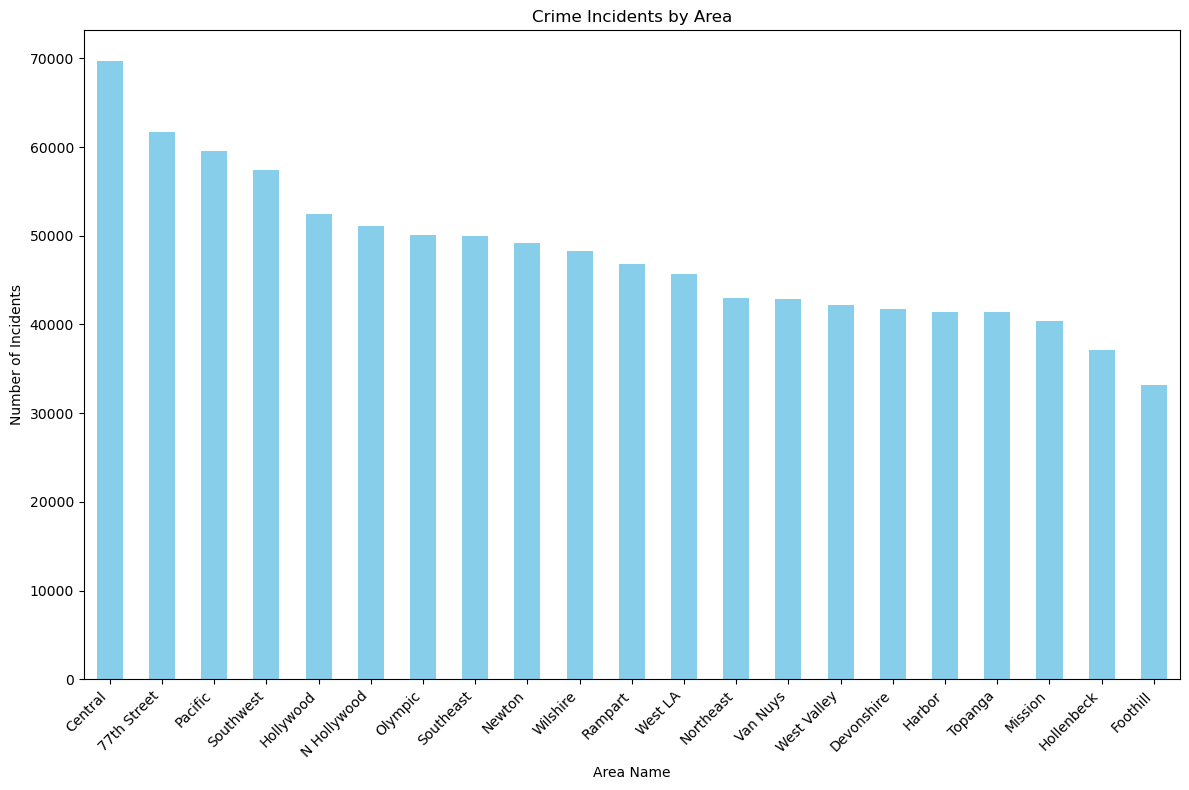

In [141]:
plt.figure(figsize=(12, 8))
x.plot(kind='bar', color='skyblue')
plt.title('Crime Incidents by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [151]:
crime['Crm Cd Desc'].value_counts().head(20)

Crm Cd Desc
VEHICLE - STOLEN                                            115184
BATTERY - SIMPLE ASSAULT                                     74817
BURGLARY FROM VEHICLE                                        63511
THEFT OF IDENTITY                                            62534
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      61084
BURGLARY                                                     57874
THEFT PLAIN - PETTY ($950 & UNDER)                           53716
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               53525
INTIMATE PARTNER - SIMPLE ASSAULT                            46710
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              41311
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          36943
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     35144
ROBBERY                                                      32314
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     30898
VANDALISM - MISDEAMEANOR ($399 OR UNDER)          

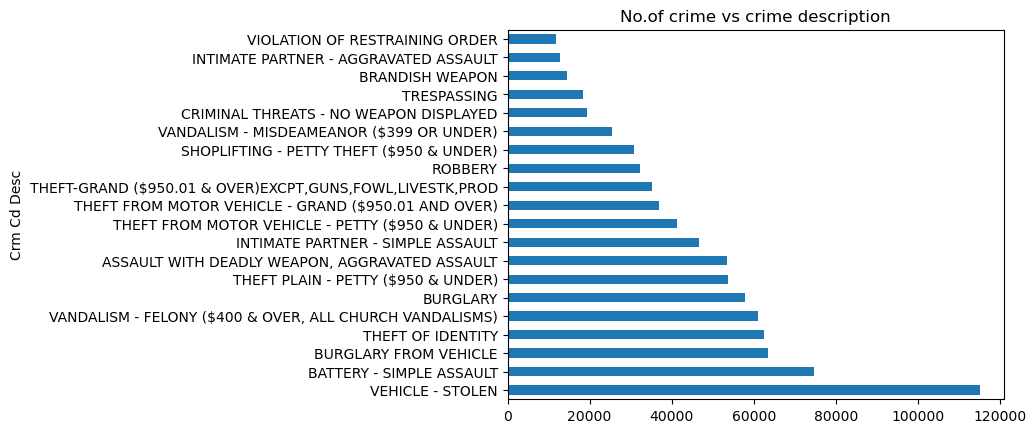

In [403]:
crime['Crm Cd Desc'].value_counts(ascending = False).head(20).plot(kind='barh')
plt.title('No.of crime vs crime description')
plt.show()

In [197]:
crime['Vict Age'].value_counts(ascending=False).head(20)

Vict Age
0     269149
30     22286
35     21827
31     21419
29     21342
28     20969
32     20842
33     20362
27     20130
34     19420
26     19327
25     19120
36     18220
23     17950
24     17884
37     17429
38     16991
22     16671
39     16151
40     15904
Name: count, dtype: int64

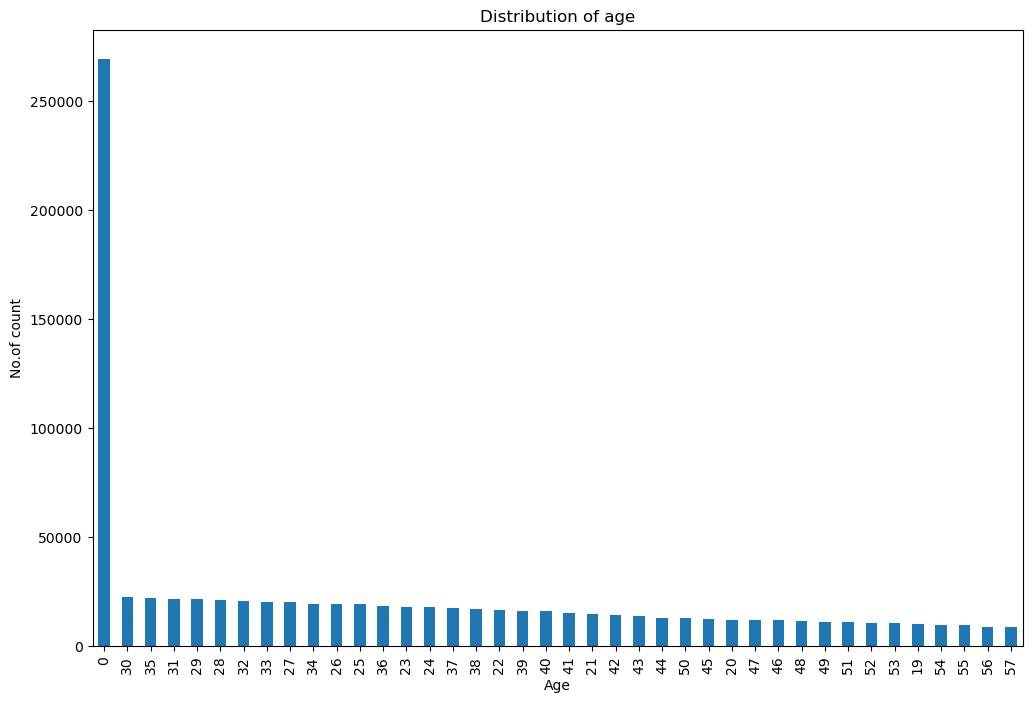

In [199]:
x = plt.figure(figsize=(12, 8))
crime['Vict Age'].value_counts().head(40).plot(kind = 'bar')
plt.title("Distribution of age")
plt.xlabel('Age')
plt.ylabel('No.of count')
plt.show()

In [217]:
x=crime['Vict Sex'].value_counts()
x

Vict Sex
M          403834
F          358543
Unknown    144604
X           97751
H             114
-               1
Name: count, dtype: int64

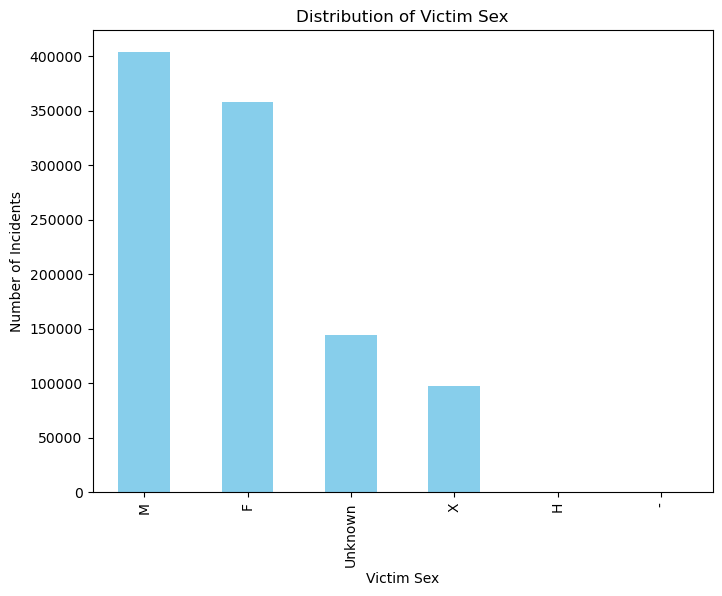

In [213]:
plt.figure(figsize=(8, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Distribution of Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Number of Incidents')
plt.show()

In [253]:
crime['Vict Sex'] = crime['Vict Sex'].replace({'X':'Unknown', 'H':'Unknown', '-':'Unknown'})

In [255]:
crime['Vict Sex'].value_counts()

Vict Sex
M          403834
F          358543
Unknown    242356
Unknowm       114
Name: count, dtype: int64

In [259]:
crime['Vict Sex'] = crime['Vict Sex'].replace({'Unknowm':'Unknown'})

In [269]:
a=crime['Vict Sex'].value_counts()

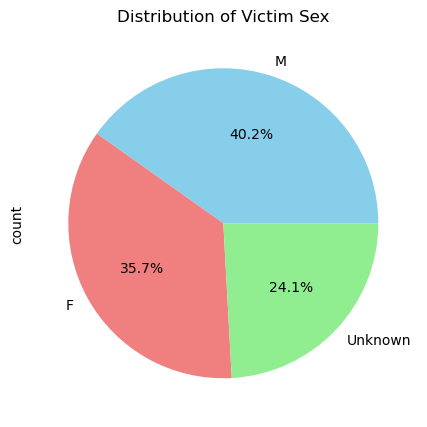

In [359]:
plt.figure(figsize=(5, 6))
a.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen','lightyellow'])
plt.title('Distribution of Victim Sex')
plt.show()

In [273]:
crime.head(2)

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628


In [283]:
crime['LOCATION'].nunique()

66564

In [287]:
crime['Status Desc'].nunique()

6

In [289]:
crime['Status Desc'].unique()

array(['Adult Arrest', 'Invest Cont', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [293]:
crime['Status Desc'].value_counts()

Status Desc
Invest Cont     804413
Adult Other     108801
Adult Arrest     86525
Juv Arrest        3245
Juv Other         1856
UNK                  7
Name: count, dtype: int64

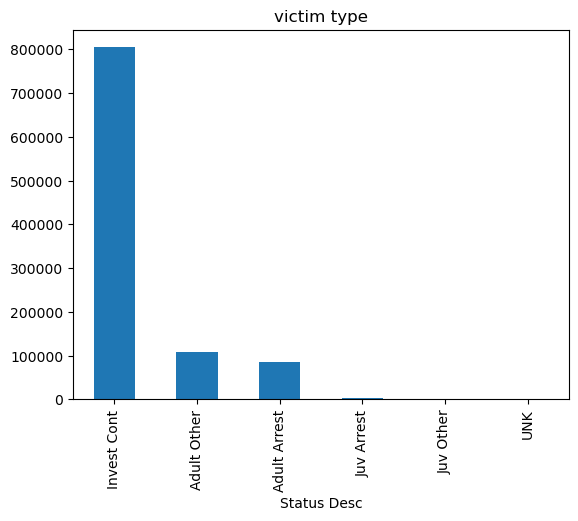

In [405]:
v = crime['Status Desc'].value_counts().plot(kind = 'bar')
plt.title('victim type')
plt.show()

In [321]:
crime['Date Rptd'].value_counts()

Date Rptd
2023-02-02    929
2023-02-03    927
2023-01-03    914
2022-05-02    909
2022-04-04    883
             ... 
2025-01-08      2
2025-01-03      2
2025-01-05      2
2025-01-06      1
2025-01-13      1
Name: count, Length: 1840, dtype: int64

In [325]:
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], errors='coerce')

crime['Report Year'] = crime['Date Rptd'].dt.year

In [331]:
yearly_counts = crime['Report Year'].value_counts()
yearly_counts

Report Year
2022    235065
2023    234650
2021    208285
2020    192708
2024    134093
2025        46
Name: count, dtype: int64

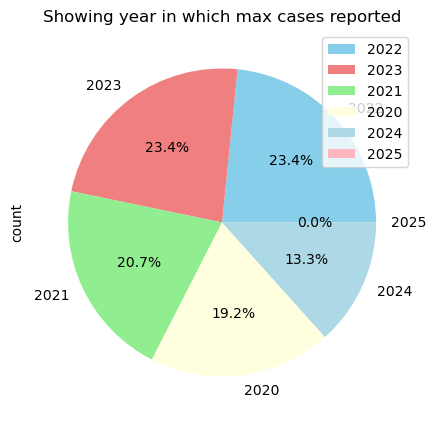

In [357]:
plt.figure(figsize=(5, 5))
yearly_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen','lightyellow','lightblue','lightpink'])
plt.title('Showing year in which max cases reported')
plt.legend()
plt.show()

In [365]:
crime['Report Month'] = crime['Date Rptd'].dt.month

In [371]:
monthly_counts = crime.groupby(['Report Year', 'Report Month']).size()

max_month = monthly_counts.idxmax()
max_count = monthly_counts.max()

print(f"The year and month with the maximum number of reported cases is {max_month[0]}-{max_month[1]} with {max_count} cases.")

The year and month with the maximum number of reported cases is 2022-5 with 20597 cases.


In [373]:
crime.head(2)

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Report Year,Report Month
0,190326475,2020-03-01,2020-03-01,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3
1,200106753,2020-02-09,2020-02-08,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2


In [381]:
pivot_table = crime.pivot_table(index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0)
pivot_table

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
AREA NAME,,,,,,,,,,,,,,,,,,,,,
77th Street,203,82,5921,483,4707,7,281,178,0,0,...,10,3399,1741,281,8766,4,231,672,18,2
Central,233,157,4048,457,6806,47,329,394,2,1,...,12,4810,1686,145,5051,209,142,282,11,3
Devonshire,53,15,1329,110,2687,7,59,171,0,0,...,33,2109,786,116,3959,62,353,381,131,0
Foothill,94,52,1741,104,2418,7,68,141,1,0,...,11,2007,873,110,4539,10,397,512,56,3
Harbor,91,26,2342,169,3157,10,83,127,0,0,...,13,2759,1335,321,6137,48,404,1196,18,4
Hollenbeck,99,61,2335,171,3091,12,84,123,0,0,...,6,2524,1252,220,6213,10,378,740,45,1
Hollywood,128,55,2739,288,4482,19,200,285,1,0,...,31,3521,1150,75,3995,114,212,422,22,6
Mission,101,38,1985,164,2606,9,85,205,0,0,...,18,2305,899,151,6050,15,367,1021,43,0
N Hollywood,143,32,1973,160,3433,8,97,211,0,1,...,29,3318,1177,205,5106,74,104,106,37,1


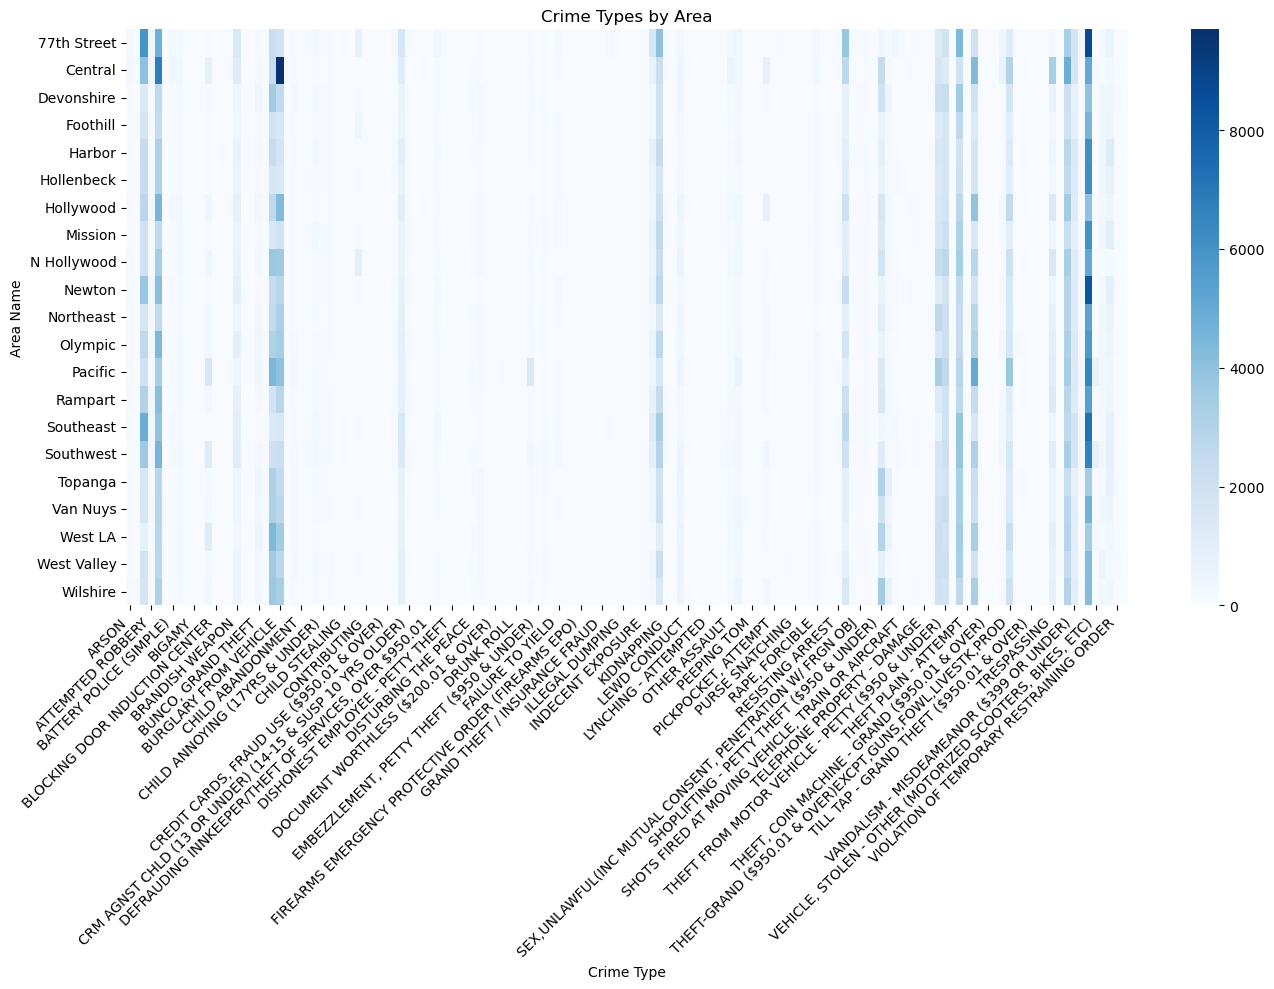

In [383]:
pivot_table = crime.pivot_table(index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='Blues', annot=False)
plt.title('Crime Types by Area')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

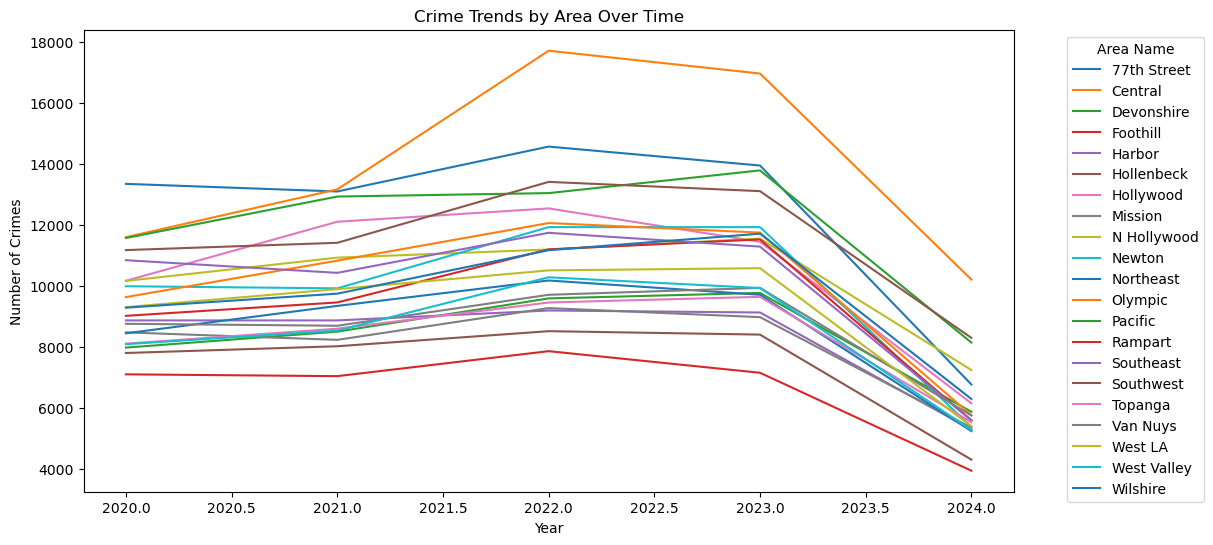

In [399]:
yearly_area_counts = crime.groupby(['Year', 'AREA NAME']).size().unstack(fill_value=0)

yearly_area_counts.plot(figsize=(12, 6))
plt.title('Crime Trends by Area Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#insights and conclusion 
